# 1. Bibliotecas

In [97]:
!pip install autograd

In [4]:
import autograd

from autograd import jacobian
from autograd.misc.optimizers import adam
from autograd.scipy.integrate import odeint
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
import autograd.numpy as np
import seaborn as sns
import math as math

# 2. Exercício com derivadas no Python

In [99]:
# Exercicio utilizando autograd

def ex_funcao(x):
    y = -1.*x*x*x + 3.*x*x - 10.*x + 4.
    return y

ex_derivada = autograd.grad(ex_funcao)
dado = 3.

print(f'Valor da função: {str(ex_funcao(dado))}')
print(f'Valor da deriva: {str(ex_derivada(dado))}')

Valor da função: -26.0
Valor da deriva: -19.0


Derivada da função e aplicação do valor na sua derivada: 

- função original: -x^3+3x^2-10x+4=f(x)

- -3x^2+6x-10 = f'(X)
- f'(3) = -3.3^2 + 6.3 - 10
- f'(3) = -27 + 18 - 10
- f'(3) = -19

In [100]:
# continuação do exercício

# derivando as funções
derivada1 = autograd.grad(ex_funcao)
derivada2 = autograd.grad(derivada1)
derivada3 = autograd.grad(derivada2)

# criando um array de [-3,3] com 100 valores decimais
x = np.linspace(-3, 3, 100, dtype=float)

y = list()
y1 = list()
y2 = list()
y3 = list()

# percorrendo o array x
for i in range(len(x)):
    y.append(ex_funcao(x[i])) # calculando os valores da função em relação ao valor  de x
    y1.append(derivada1(x[i])) # valor da f'(x) para x
    y2.append(derivada2(x[i])) # valor da f''(x) para x
    y3.append(derivada3(x[i])) # valor da f'''(x) para x

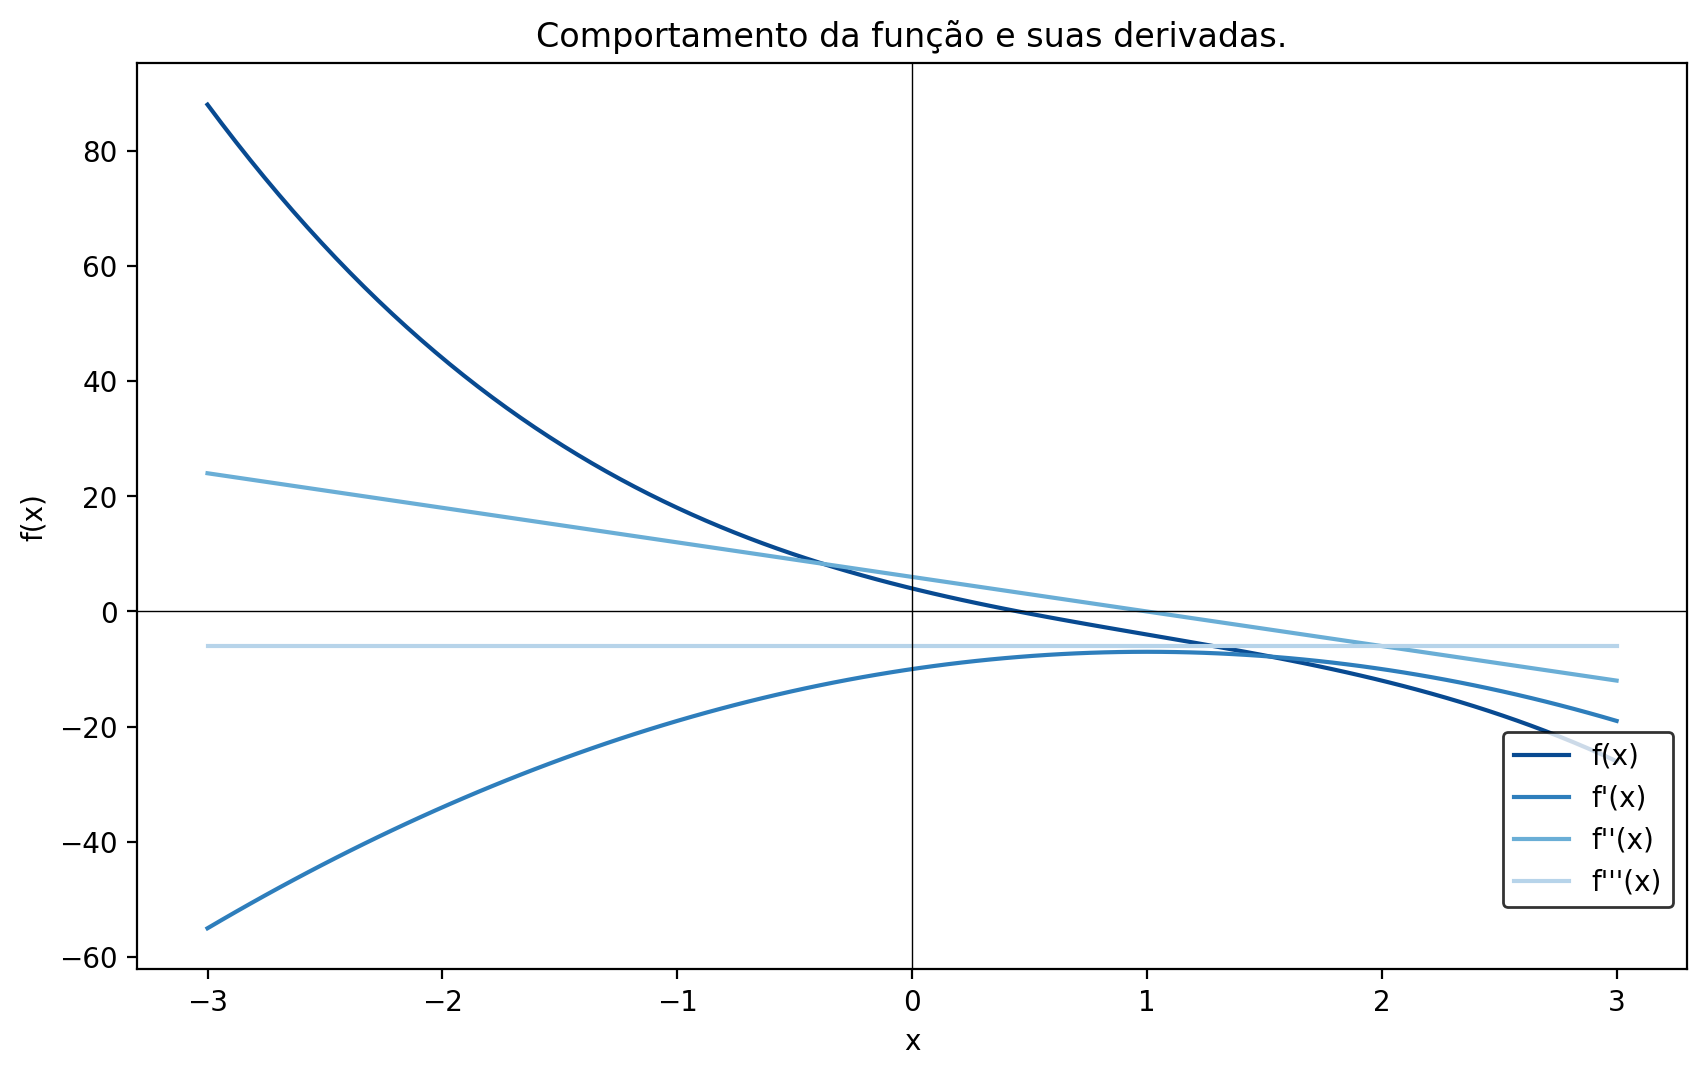

In [101]:
f, ax = plt.subplots(1, figsize=(10,6), dpi=200)

ax.plot(x, y, label="f(x)", color=plt.get_cmap("Blues")(0.9)) # 1° curva da funcao

ax.plot(x, y1, label="f'(x)", color=plt.get_cmap("Blues")(0.7)) # 2° curva da funcao com os valores da derivada primeira da f'(x)

ax.plot(x, y2, label="f''(x)", color=plt.get_cmap("Blues")(0.5)) # 3° curva da funcao com os valores da derivada segunda da f''(x)

ax.plot(x, y3, label="f'''(x)", color=plt.get_cmap("Blues")(0.3)) # 4° curva da funcao com os valores da derivada terceira da f'''(x)

ax.axhline(0, color="black", linewidth=0.5)
ax.axvline(0, color="black", linewidth=0.5)

ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title("Comportamento da função e suas derivadas.")

f.legend(loc="center right", bbox_to_anchor=(0.9,0.25), edgecolor="black")

plt.show()

In [102]:
# Fazer outro exemplo com outra funcao

In [8]:
def funcao(x):
    y = x*x**3. * 3.*x*x + 6.*x
    
    return y

derivada1 = autograd.grad(funcao)
numero = 3.

print(f'Valor da função: {str(funcao(numero))}')
print(f'Valor da deriva: {str(derivada1(numero))}')

Valor da função: 2205.0
Valor da deriva: 4380.0


In [9]:
derivada1 = autograd.grad(funcao)
derivada2 = autograd.grad(derivada1)
derivada3 = autograd.grad(derivada2)
derivada4 = autograd.grad(derivada3)

x = np.linspace(-3, 3, 100, dtype=float)

y = list()
y1 = list()
y2 = list()
y3 = list()
y4 = list()

for valor in range(len(x)):
    y.append(funcao(x[valor]))
    y1.append(derivada1(x[valor]))
    y2.append(derivada2(x[valor]))
    y3.append(derivada3(x[valor]))
    y4.append(derivada4(x[valor]))

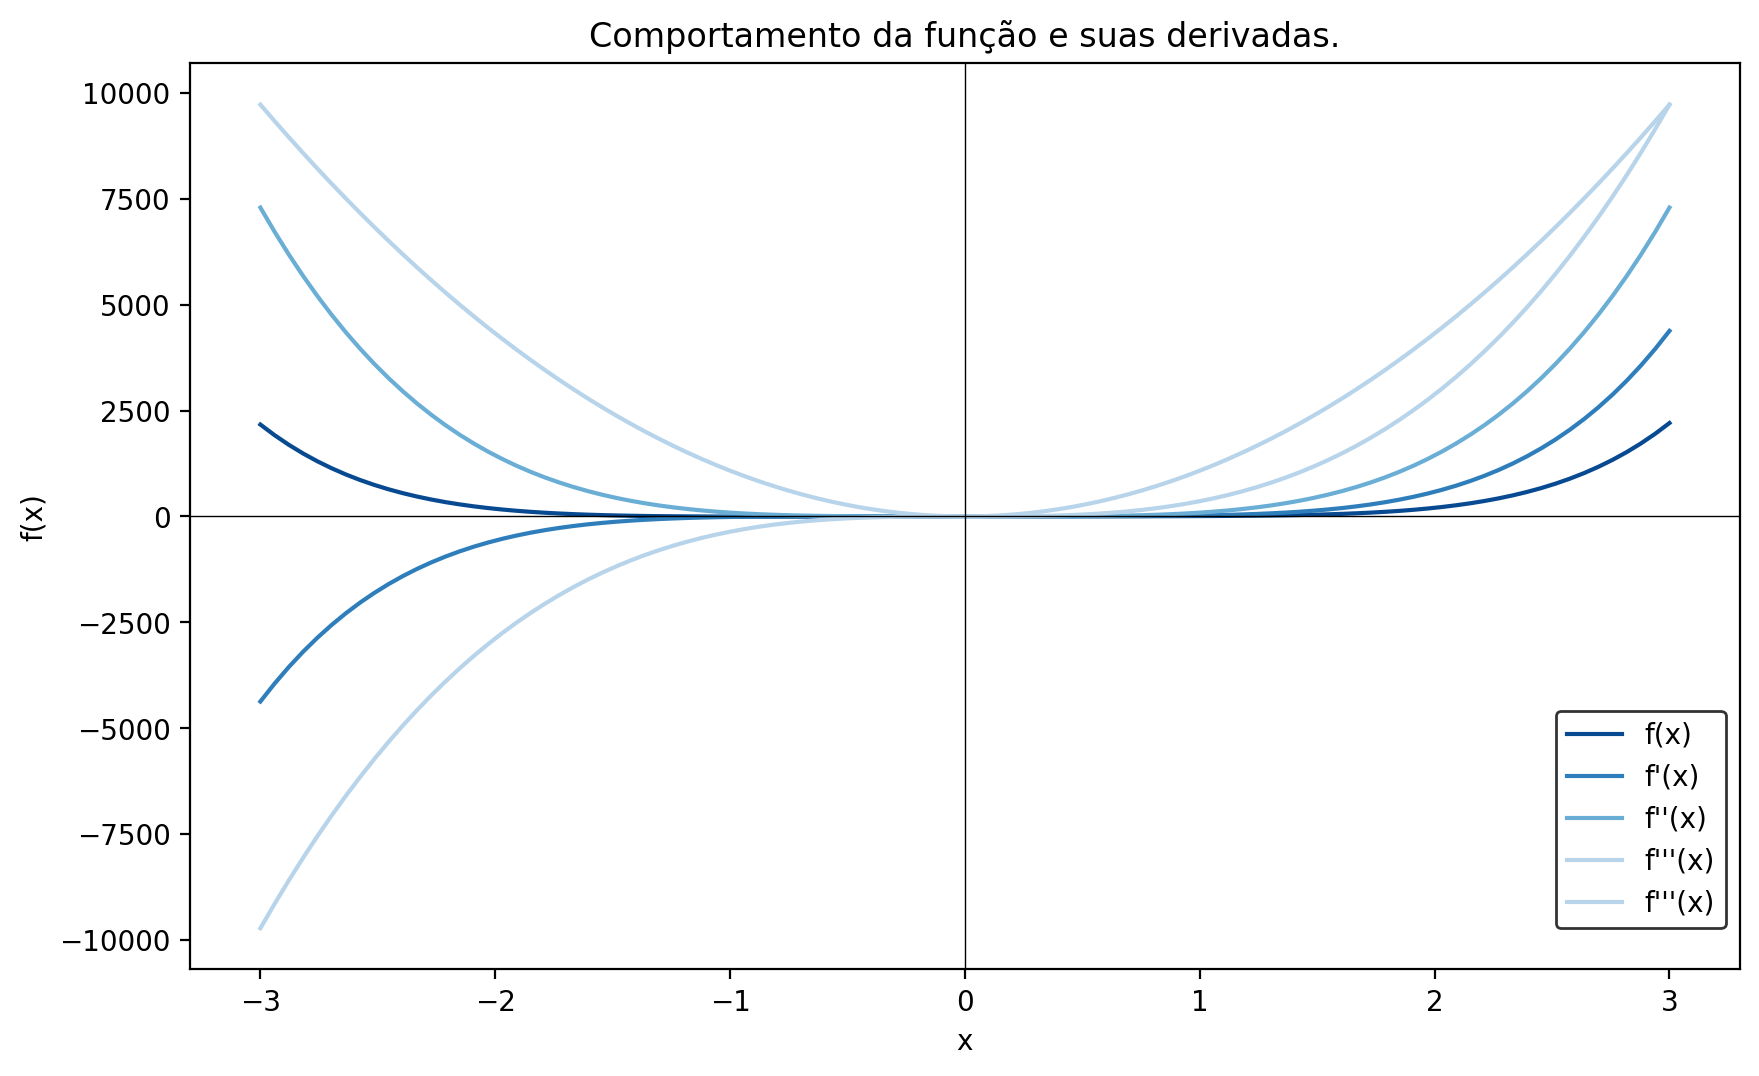

In [10]:
f, ax = plt.subplots(1, figsize=(10,6), dpi=200)

ax.plot(x, y, label="f(x)", color=plt.get_cmap("Blues")(0.9)) # 1° curva da funcao

ax.plot(x, y1, label="f'(x)", color=plt.get_cmap("Blues")(0.7)) # 2° curva da funcao com os valores da derivada primeira da f'(x)

ax.plot(x, y2, label="f''(x)", color=plt.get_cmap("Blues")(0.5)) # 3° curva da funcao com os valores da derivada segunda da f''(x)

ax.plot(x, y3, label="f'''(x)", color=plt.get_cmap("Blues")(0.3)) # 4° curva da funcao com os valores da derivada terceira da f'''(x)

ax.plot(x, y4, label="f'''(x)", color=plt.get_cmap("Blues")(0.3)) # 5° curva da funcao com os valores da derivada terceira da f'''''(x)

ax.axhline(0, color="black", linewidth=0.5)
ax.axvline(0, color="black", linewidth=0.5)

ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title("Comportamento da função e suas derivadas.")

f.legend(loc="center right", bbox_to_anchor=(0.9,0.25), edgecolor="black")

plt.show()

# 3. Modelo Híbrido

## 3.1. Construindo rede neural

In [103]:
np.random.seed(0)

def init_random_params(layer_sizes, scale):
    
    params = []
    
    for idx in range(len(layer_sizes)-1):
        weight_mat_elem = layer_sizes[idx]*layer_sizes[idx+1]
        bias_vec_elem = layer_sizes[idx+1]
        params = np.append(params, np.random.rand(weight_mat_elem+bias_vec_elem))
    return params*scale

In [104]:
def neural_net_predict(params, inputs):
    
    params = params.flatten()
    
    sep = 0
    
    for idx in range(len(layer_sizes)-1):
        # Calculando o peso das matrizes
        W = params[sep:sep+layer_sizes[idx]*layer_sizes[idx+1]].reshape(layer_sizes[idx],layer_sizes[idx+1])
        
        # Calculando o bias vector
        b = params[sep+layer_sizes[idx]*layer_sizes[idx+1]:sep+layer_sizes[idx]*layer_sizes[idx+1]
                   +layer_sizes[idx+1]]
       
        # Definindo o novo valor de separador
        sep = layer_sizes[idx]*layer_sizes[idx+1]+layer_sizes[idx+1]
        
        # Calcular saida como soma ponderada de entrada mais viés
        outputs = np.dot(inputs, W) + b
        
        # Aplique a função de ativação e atribua o resultado como entrada para a próxima camada
        # (observe que isso não tem efeito na camada de saída)
        inputs = 1/(1 + np.exp(-outputs))
        
    return outputs

## 3.2. Parâmetros do modelo do CSTR

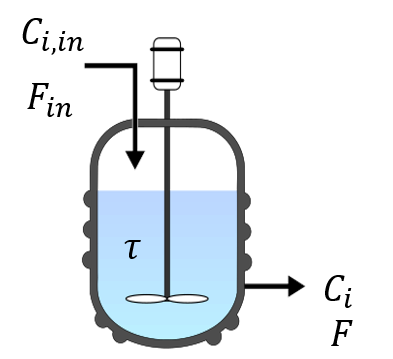

Concentrações de entrada da substancia no reator

- C A,in = 0.7 kmol/m^3
- C B,in = 0.3 kmol/m^3
- C X,in = 0 kmol/m^3

A partir dos dados, sabe-se que o experimento foi iniciado com as seguintes concentrações iniciais:
- C A,0 = 0.5 kmol/m^3
- C B,0 = 0.5 kmol/m^3
- C X,0 = 0 kmol/m^3

In [105]:
# Inicializando os parâmetros do modelo do reator

# Parametros do sistema
tau = 100

# Concentracoes de entrada
c_Ain = 0.7
c_Bin = 0.3
c_Xin = 0

# Condicoes iniciais para concentracoes no reator 
c_A0 = 0.5
c_B0 = 0.5
c_X0 = 0

# Hora final para integracao
t_end = 100
n_samples = 30
t_span = np.linspace(0, t_end, n_samples)

## 3.3. Parte mecanicista do modelo

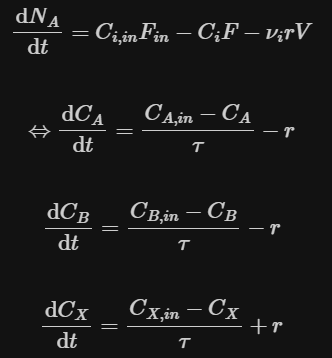

In [110]:
# Definindo o sistema de equacoes
def dcdt(c, t, params):
    # Parte mecanística do modelo híbrido (sistema ODE descrevendo as concentrações dependentes do tempo no reator)
    
    # Demonstar vetor de entrada
    c_A, c_B, c_X = c
    
    # Calculando taxas de reacao por previsao de rede neural
    r = neural_net_predict(params, c)
    
    # r = 0.08*c_A**0.7*c_B**1.3 
    # Verdadeira taxa de reação subjacente
    # Sistema de equacoes 
    dcdt = [(c_Ain-c_A)/tau - r, (c_Bin-c_B)/tau - r, (c_Xin-c_X)/tau + r]
    
    return np.array(dcdt)

Usar o autograd para calcular o jacobiano em relacao aos estados do sistema e aos parâmetros, que recisarem para as equacoes de sensibilidade

In [111]:
# Calcula o sistema jacobiano e derivados de parâmetros por diferenciação automática com autograd
dfdc = autograd.jacobian(dcdt, 0)  # Sistema jacobiano
dfdp = autograd.jacobian(dcdt, 2)  # Derivadas do parâmetro

In [112]:
# Escrevemos uma funcao que recebe as variaveis do sistema y no tempo t e calcula a sensibilidades

def DiffEqs(y, t, params):
    # Modelo híbrido incluindo o sistema ODE para as concentrações, bem como as sensibilidadesque são usados para treinar a parte da rede neural do modelo
    
    # Desmontar vetor de entrada
    c = y[:3]
    s = y[3:]
    
    # Avaliacao do sistema jacobiano no ponto atual
    dfdc_eval = dfdc(c, t, params)
    
    # Avaliar derivadas de parametros no ponto atual
    dfdp_eval = dfdp(c, t, params)
    
    # Definicao da sensibilidade para todos os parametros
    dcdp = np.zeros(len(s)) # Alocando memoria para sensibilidade
    
    for i in range(len_p): # Percorrer todos os parâmetros para construir as equações de sensibilidade correspondentes
        dcdp[i*len_c:(i+1)*len_c] = (dfdc_eval @ s[i*len_c:(i+1)*len_c]).flatten() + dfdp_eval[:,0,i] 
        # Construir sensibilidades (VER: https://docs.sciml.ai/v4.0/analysis/sensitivity.html#Example-solving-an-ODELocalSensitivityProblem-1)
        # [c1/w1, c2/w1, c3/w1, c1/w2, ...]
        
    return np.concatenate((dcdt(c, t, params).flatten(), dcdp))

## 3.4. Treinamento da rede

In [113]:
# Para treinar a rede é necessario os seguintes parametros

scale = 0.0005
num_epochs = 1000
step_size = 0.001

# Definir tamanho da rede neural
layer_sizes = [3, 3, 1]  # n°. de nós na camada de entrada, camada(s) oculta(s) e camada de saída

# Inicializar vetor de parâmetro para rede neural ou carregar parâmetros salvos
init_params = init_random_params(layer_sizes, scale)

In [114]:
# Valor inicial das variáveis

c0 = [c_A0, c_B0, c_X0]
len_c = len(c0)
len_p = len(init_params)
s0 = np.zeros((len_p*len_c))
y0 = np.concatenate((c0,s0))

## 3.5. Importando dados para treinamento

In [115]:
data = pd.read_csv("https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/CSTR_ODE_data.txt", sep=';')
c_exp = np.array(data)

Definindo a funcao objetivo, ou funcao perda, ou funcao risco ou fucao erro. Primeiro, o modelo é executado e em seguida a diferenca entre os dados experimentais e a previsao do modelo é calculada como valor objetivo

In [116]:
def objective(params, iter):
    # Função objetiva (soma dos erros quadrados entre medições e previsões do modelo)
    
    # Calcular o modelo híbrido na direção direta com odeint
    sol = odeint(DiffEqs, y0, t_span, args=(params,))
    
    # Desmontar resultados
    c_pred = sol[:,:3] # Concentrações previstas
    
    return np.trace((c_pred - c_exp).T @ (c_pred - c_exp))

In [117]:
# Para treinar o modelo, exige-se o gradiente do objetivo em relacao aos parametros 
def objective_grad(params, iter):
    # A função calcula o gradiente da função objetivo em relação aos parâmetros da rede
    
    sol = odeint(DiffEqs, y0, t_span, args=(params,))
    
    # Desmontar resultados
    c_pred = sol[:,:3] # Concentrações previstas
    
    sens = sol[:,3:] # Sensibilidades 16*3=48 -> c1/w1, c2/w1, c3/w1, c1/w2.....
    
    # Calcular gradientes da função de perda
    loss_grad = np.zeros(len_p) # Definindo tamanho do vetor
    
    for comp_idx in range(len_c):
        # For loop está em execução para cada concentração e todos os parâmetros
        loss_grad += sens[:,comp_idx::3].T @ (c_pred[:,comp_idx] - c_exp[:,comp_idx])
        
    return loss_grad

In [118]:
# Funcao que permite imprimir o estado do modelo durante o treinamento

def summary(params, iter, gradient):
    # A função de retorno de chamada fornece uma saída informativa durante a otimização
    
    if iter % 10 == 0:
        print('Etapa {0:5d}: {1:1.3e}'.format(iter, objective(params, iter)))
        np.save('Params', params)

Agora vamos treinar o modelo com Adam! Lembre-se, adam é um método de descida de gradiente com uma taxa de aprendizado adaptável. Ele usa os gradientes anteriores (momentum) e seus quadrados (RMSProp) para calcular a próxima iteração.

Observação: o código levará alguns minutos para ser executado.

In [119]:
# Otimize os parametros de rede 
optimized_params = adam(objective_grad, init_params, step_size=step_size, num_iters=num_epochs, callback=summary)

Etapa     0: 4.279e+00
Etapa    10: 4.804e-01
Etapa    20: 5.815e-01
Etapa    30: 4.494e-01
Etapa    40: 3.714e-01
Etapa    50: 3.808e-01
Etapa    60: 3.715e-01
Etapa    70: 3.713e-01
Etapa    80: 3.696e-01
Etapa    90: 3.695e-01
Etapa   100: 3.689e-01
Etapa   110: 3.685e-01
Etapa   120: 3.681e-01
Etapa   130: 3.676e-01
Etapa   140: 3.672e-01
Etapa   150: 3.667e-01
Etapa   160: 3.662e-01
Etapa   170: 3.656e-01
Etapa   180: 3.650e-01
Etapa   190: 3.644e-01
Etapa   200: 3.637e-01
Etapa   210: 3.630e-01
Etapa   220: 3.622e-01
Etapa   230: 3.614e-01
Etapa   240: 3.605e-01
Etapa   250: 3.596e-01
Etapa   260: 3.586e-01
Etapa   270: 3.575e-01
Etapa   280: 3.563e-01
Etapa   290: 3.550e-01
Etapa   300: 3.536e-01
Etapa   310: 3.521e-01
Etapa   320: 3.505e-01
Etapa   330: 3.487e-01
Etapa   340: 3.468e-01
Etapa   350: 3.447e-01
Etapa   360: 3.425e-01
Etapa   370: 3.401e-01
Etapa   380: 3.375e-01
Etapa   390: 3.347e-01
Etapa   400: 3.317e-01
Etapa   410: 3.284e-01
Etapa   420: 3.250e-01
Etapa   430

Vamos comparar as soluções do modelo com os parâmetros iniciais versus os parâmetros otimizados. Precisamos executar o modelo adiante no tempo, primeiro com os parâmetros iniciais, depois com os parâmetros otimizados no treinamento:

In [120]:
sol_init = odeint(DiffEqs, y0, t_span, args=(init_params,))
sol_opt = odeint(DiffEqs, y0, t_span, args=(optimized_params,))

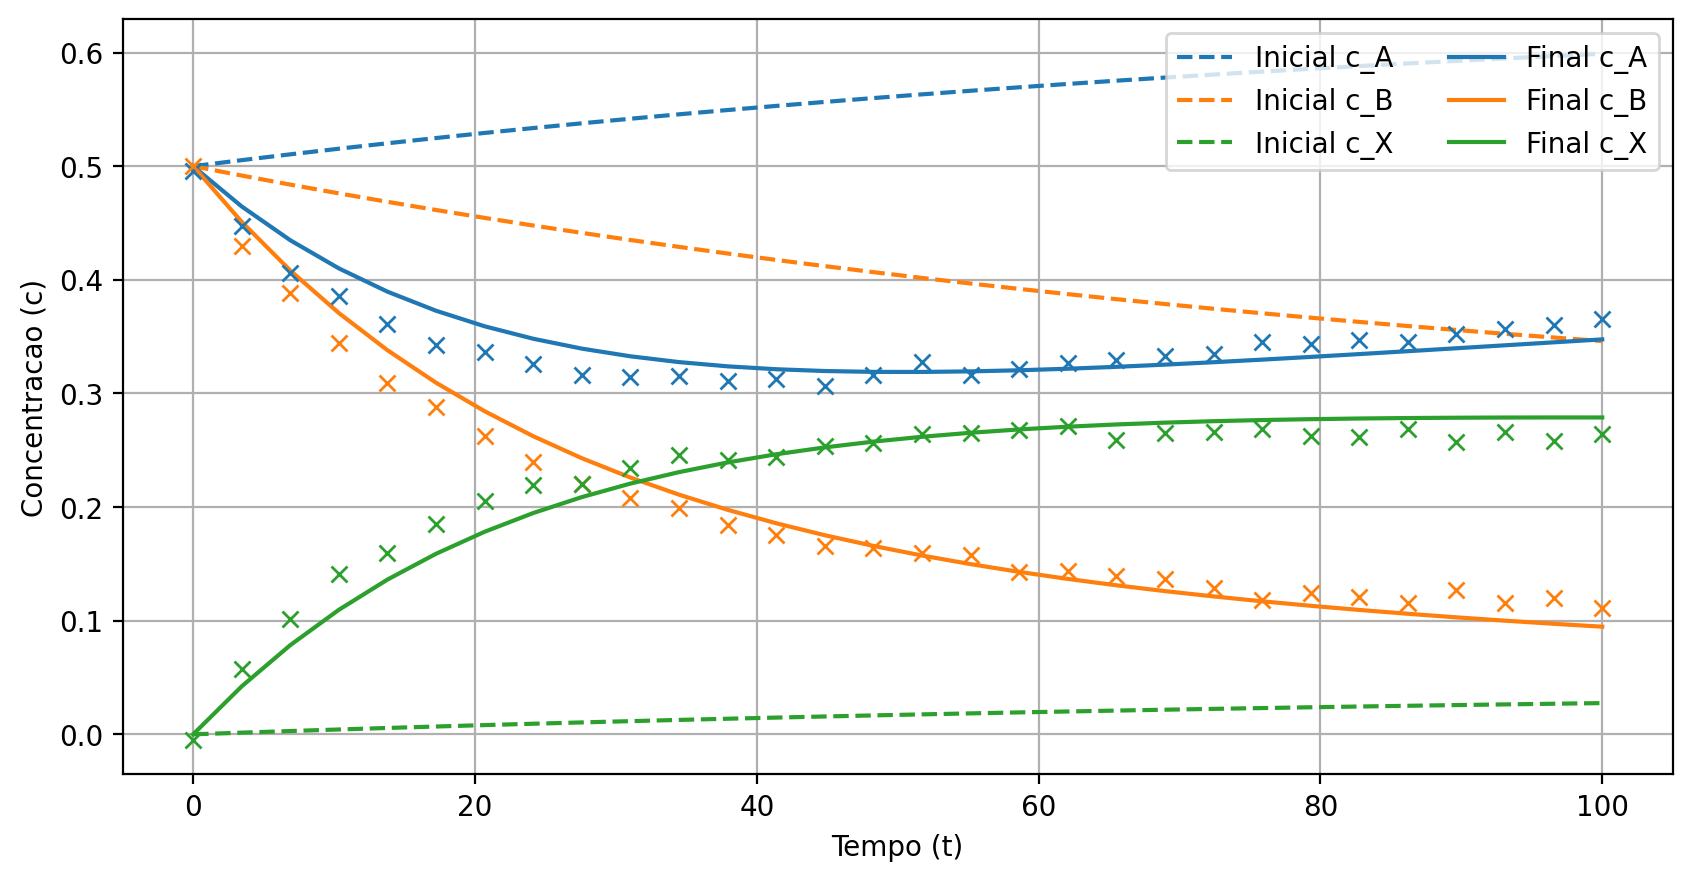

In [121]:
# Gráfico com as trajetórias das três componentes para o modelo nao treinado VS modelo treinado

plt.figure(figsize=(10,5), dpi=200)

plt.plot(t_span, sol_init[:,:len_c], '--')
plt.gca().set_prop_cycle(None)

plt.plot(t_span, sol_opt[:,:len_c])
plt.gca().set_prop_cycle(None)

plt.plot(t_span, c_exp, 'x')

plt.xlabel('Tempo (t)')
plt.ylabel('Concentracao (c)')
plt.legend(('Inicial c_A', 'Inicial c_B', 'Inicial c_X', 
            'Final c_A', 'Final c_B', 'Final c_X'), loc='upper right',ncol=2) 
plt.grid()
plt.show()